# Introduction

Tuberculosis (TB) is considered to be the second leading cause of death after HIV/AIDS. It infects humans through an airborne bacteria called Mycobacterium Tuberculosis. When active, TB manifests itself through various signs and symptoms, including prolonged cough, night sweats, shortness of breath, weight loss and fever.

Lymphoma is an ensemble of cancerous diseases which are potentially curable. However, in countries with huge tuberculosis (TB) burden, lymphoma patients can be suspected of having TB and receive treatment that they do not need, thus delaying treatment of the cancer. This is due to the similar symptoms both diseases share. 

The research reported here visualises and cleans textual clinical notes for both TB and lymphoma to be used for classification.


# Installing wordcloud library

In [4]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install wordcloud

# Loading libraries

In [15]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
print("Libraries loaded!")

Libraries loaded!


# Generating cloud for patient case example

<b>Load cases</b>

In [9]:
import pandas as pd

df1= pd.read_csv('TB.csv',encoding='latin-1')
df2= pd.read_csv('lymph.csv',encoding='latin-1')
#df1=df1.drop(['Notes'], axis=1)
#df1=df1.dropna()

In [10]:
#df1.Label.apply(int)
df1.tail(10)

,Unnamed: 0,PII,Title,Case,Label
536,5663,S1472979202000562,What is the limit to case detection under the ...,2 Methods We use 6 consecutive years (199520...,0
537,5794,S1098301515039893,PIN3: Coping With Discrepancies In Epidemiolog...,Methods The following potential sources of ep...,0
538,5800,S0168851010001764,Manifestations of tuberculosis stigma within t...,2 Methodology The study had ethical consent f...,0
539,5929,S0422763816302321,Pseudochylothorax as the first manifestation o...,"Case report A 53-year-old man, originated fro...",0
540,5932,S0041134503009217,Primary tuberculosis 1 year after conversion f...,Case report A 26-year-old man with renal fail...,0
541,5956,S0022510X13022363,Multifocal tuberculosis revealed by cerebellar...,Purpose: To describe the characteristics of m...,0
542,5984,S2444382416300773,Lower gastrointestinal bleeding as a presentat...,Tests revealed 7.6g/dL hemoglobin levels with ...,0
543,6030,S0019483215007415,Marfan Syndrome with type-1 diabetes and pulmo...,A 17-year-old male presented to our hospital i...,0
544,6060,S0929664612003373,A rare case of the coexistence of latent tuber...,A 35-year-old man with fever and night sweatin...,0
545,6080,S1473309902003018,Nearly 70% of tuberculosis cases remain undete...,The rate of progress in case finding between ...,0


In [38]:
df1.Case[0]

' Case report An African14-year-old girl was admitted to the pediatric disease department for investigation of an adnexal mass. Five months before admission, she immigrated to Portugal from Angola. One month after being in Portugal, she started feeling fatigue, loss of appetite, daily somnolence, and a persistent dry cough. She was medicated with an antihistaminic with some improvement of the cough. As the symptoms persisted, she had some laboratory tests, which showed microcytic hypochromic anemia that was medicated with iron replacement therapy. Two months later, she went to the emergency department due to aggravating symptoms, fever (of irregular pattern), weight loss (4 kg in 1 month), a low abdominal pain, and pain with inspiration in the right hemithorax. There was no associated past medical or surgical history and no history of recent disease in her family circle. She had no other signs or symptoms, namely, no menstrual disturbances (menarcha at 10 years), no urinary, respirator

In [2]:
df2.tail()

,Unnamed: 0,PII,Title,Case,Label
128,1475,S2352587815000388,The non-specific symptoms of breast implant-as...,Case report A 42-year-old woman underwent bil...,1
129,1513,S2352512617301443,Intravascular large B-cell lymphoma presenting...,Case report A 77-year-old Iranian woman was a...,1
130,1516,S2214751914000279,Primary central nervous system lymphoma presen...,Case report History and examination This 42y...,1
131,1654,S0022510X17325996,Bilateral symmetrical metastatic changes of br...,"Objective: This is a rare presentation, immun...",1
132,1688,S1726490114000975,Intraocular involvement of T-cell lymphoma pre...,2 Case Report An 81-year-old male was referre...,1


In [39]:
df2.Case[0]

' 2 Case report We report the case of a (It is about) 65 years old man, living in Casablanca, Morocco, with no medical or surgical history, admitted in our ENT department for an anterior and medial cervical tumefaction, which started growing 8 months ago, rapidly increasing in volume without pain. The other symptoms were general pruritus, night sweats and fatigue, with no fever, no emaciation, no dyspnea, no dysphonia or thyroid gland disorder. There were no similar cases reported in the patient\x92s family. The palpation found a hard tumefation, and no palpable cervical lymph nodes. The general physical examination didn\x92t find any hepatomegaly, or splenomegalia or other clinically palpable lymphnods in the body. Blood count cells showed a disorder of lymphocytes that were slightly increased. Accelerated sedimentation rate. Cervical and thoracic CT scans were done showing a tissue mass of the right thyroid lobe dipping to the anterior and middle mediastinum. Thyroid fine needle aspi

<b>View cloud for one case</b>


Save word cloud as image

In [8]:
# Save the image in the img folder:
#wordcloud.to_file("first_review.png")

<b>Combine all cases</b>

In [11]:
#TB
textTB = " ".join(case for case in df1.Case)
print ("There are %d words in the combination of all cases." % len(textTB))

There are 1695553 words in the combination of all cases.


In [13]:
#Lymph
textLymph = " ".join(case for case in df2.Case)
print ("There are %d words in the combination of all cases." % len(textLymph))

There are 382669 words in the combination of all cases.


__Create cloud__

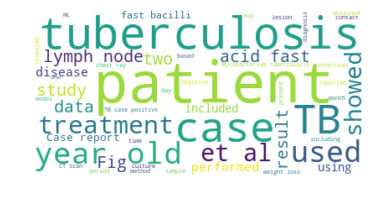

In [16]:
# Generate a word cloud image for TB
wordcloud = WordCloud(background_color="white",max_words=50).generate(textTB)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

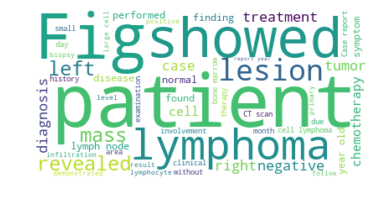

In [17]:
# Generate a word cloud image for TB
wordcloud = WordCloud(background_color="white",max_words=50).generate(textLymph)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Get individual words

In [18]:
#TB
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

# fit our vectorizer. This will take a while depending on your computer. 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df1.Case.values)
# get the column names
vect.get_feature_names()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['a',
 'abdomen',
 'abdominal',
 'abdominopelvic',
 'able',
 'abnormal',
 'abnormalities',
 'abnormality',
 'about',
 'above',
 'abs',
 'abscess',
 'abscesses',
 'abscessus',
 'absence',
 'absent',
 'absolute',
 'abuse',
 'ac',
 'accepted',
 'access',
 'accompanied',
 'accordance',
 'according',
 'accordingly',
 'account',
 'acf',
 'achieved',
 'acid',
 'across',
 'active',
 'activities',
 'activity',
 'acute',
 'ada',
 'added',
 'addison',
 'addition',
 'additional',
 'additionally',
 'address',
 'adenopathy',
 'adenosine',
 'adherence',
 'adherent',
 'adhesion',
 'adhesions',
 'adjacent',
 'adjusted',
 'administered',
 'administration',
 'administrative',
 'admission',
 'admitted',
 'adnexal',
 'adrenal',
 'adult',
 'adults',
 'advanced',
 'adverse',
 'advised',
 'ae',
 'afb',
 'afebrile',
 'affect',
 'affected',
 'africa',
 'african',
 'after',
 'again',
 'against',
 'agar',
 'agarose',
 'age',
 'aged',
 'agents',
 'aggravated',
 'ago',
 'aids',
 'ain',
 'air',
 'airway',
 'al',
 'a

In [19]:
#TB
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df2.Case.values)
# get the column names
vect.get_feature_names()

['a',
 'abdomen',
 'abdominal',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'about',
 'above',
 'abscess',
 'abscesses',
 'absence',
 'absent',
 'absolute',
 'abundant',
 'abuse',
 'abvd',
 'ac',
 'accompanied',
 'accomplished',
 'accordance',
 'according',
 'accumulation',
 'achalasia',
 'ache',
 'achieve',
 'achieved',
 'achieving',
 'acid',
 'acquired',
 'acromegaly',
 'across',
 'active',
 'activities',
 'activity',
 'acuity',
 'acute',
 'adc',
 'addition',
 'additional',
 'additionally',
 'adenocarcinoma',
 'adenoma',
 'adenopathies',
 'adenopathy',
 'adipose',
 'adjacent',
 'adjuvant',
 'administered',
 'administration',
 'admission',
 'admitted',
 'admixed',
 'adnexa',
 'adrenal',
 'adriamycin',
 'advanced',
 'advised',
 'ae',
 'affected',
 'affecting',
 'aforementioned',
 'after',
 'afterwards',
 'again',
 'against',
 'age',
 'agent',
 'aggregates',
 'aggressive',
 'ago',
 'air',
 'al',
 'alanine',
 'albumin',
 'alcl',
 'alcls',
 'alcohol',
 'alive',
 'alk',


In [34]:
 dfbig=pd.concat([df1.Case,df2.Case])

### Visualise word occurence

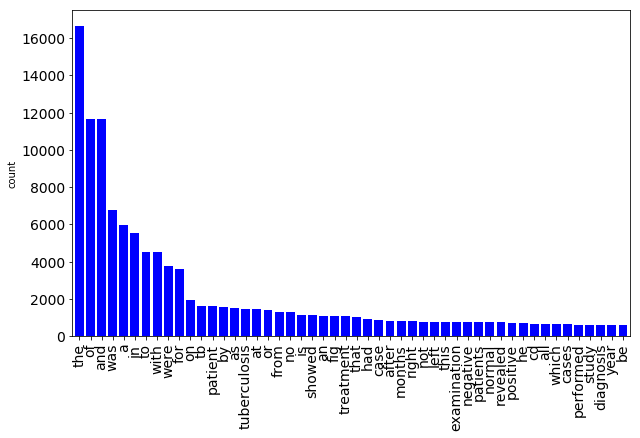

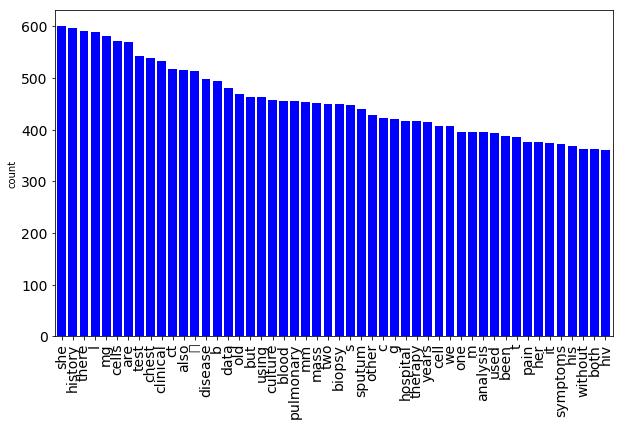

In [20]:
def plotFeatures():   
    neg_doc_matrix = vect.transform(df1.Case)
    pos_doc_matrix = vect.transform(df2.Case)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)
    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))

    term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
    term_freq_df.columns = ['negative', 'positive']
    term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
    term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

    #Create a series from the sparse matrix
    d = pd.Series(term_freq_df.total, 
                  index = term_freq_df.index).sort_values(ascending=False)
    ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    
plotFeatures()

In [32]:
def visualise(vec):
   
    vec.fit(dfbig)

    neg_train = df1.Case
    pos_train = df2.Case
    neg_doc_matrix = vec.transform(neg_train)
    pos_doc_matrix = vec.transform(pos_train)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)

    from scipy.stats import hmean
    from scipy.stats import norm
    def normcdf(x):return norm.cdf(x, x.mean(), x.std())

    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))
    term_freq_df2 = pd.DataFrame([neg,pos],columns=vec.get_feature_names()).transpose()
    term_freq_df2.columns = ['negative', 'positive']
    term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
    term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
    term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
    term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
    term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
    term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
    
    return term_freq_df2.sort_values(by='pos_freq_pct_normcdf', ascending=False).iloc[:20]
cvec = CountVectorizer(max_features=10000)
visualise(cvec)

,negative,positive,total,pos_rate,pos_freq_pct,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
to,3823,716,4539,0.157744,0.013425,0.454771,1.000000,0.625213
was,5613,1156,6769,0.170779,0.021675,0.473151,1.000000,0.642366
with,3534,984,4518,0.217795,0.018450,0.539643,1.000000,0.700998
for,3081,515,3596,0.143215,0.009656,0.434398,1.000000,0.605687
the,13888,2780,16668,0.166787,0.052125,0.467514,1.000000,0.637151
were,3286,478,3764,0.126993,0.008963,0.411858,1.000000,0.583427
and,9514,2154,11668,0.184607,0.040388,0.492714,1.000000,0.660158
of,9547,2126,11673,0.182130,0.039863,0.489206,1.000000,0.657002
in,4631,919,5550,0.165586,0.017231,0.465819,1.000000,0.635575
patient,1285,353,1638,0.215507,0.006619,0.536417,1.000000,0.698270


### Remove non-useful words

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(['TB','tuberculosis','study','patient','patients','case','used','well','patient','using','treated','follow','followed','cases','report','data','one','reported','based','report','started','including','associated','two','day','complaint','examination','showed','seen','performed','figure','fig','cm','months', 'time','presented','revealed','mm', 'found','month', 'week','weeks', 'symptoms','year','years','finding','history','patient','clinic','hospital','presents','presented','old'])

vect = CountVectorizer(max_features = 10000, 
                       tokenizer = tokenizer_better, 
                       stop_words = stopwords)
visualise(vect)

,negative,positive,total,pos_rate,pos_freq_pct,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
examination,615,142,757,0.187583,0.003981,0.498762,1.0,0.665565
biopsy,297,153,450,0.340000,0.004289,0.698646,1.0,0.822592
tumor,69,152,221,0.687783,0.004261,0.956853,1.0,0.977951
normal,602,152,754,0.201592,0.004261,0.517955,1.0,0.682438
cd,112,560,672,0.833333,0.015699,0.986631,1.0,0.993270
left,570,198,768,0.257812,0.005551,0.594123,1.0,0.745392
cell,171,235,406,0.578818,0.006588,0.910031,1.0,0.952897
lymphoma,17,317,334,0.949102,0.008887,0.995513,1.0,0.997751
cells,303,268,571,0.469352,0.007513,0.832699,1.0,0.908713
l,435,154,589,0.261460,0.004317,0.598975,1.0,0.749199


In [40]:
#Redo the cloud for TB
# this could take a while
vect.fit(df1.Case.values)
#plotFeatures(df1)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=30).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'text' is not defined

### View resulting cloud

In [ ]:
#Redo the cloud for Lymphoma
# this could take a while
vect.fit(df2.Case.values)
#plotFeatures(df1)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=30).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()